# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [70]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_list = []
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #print(requests.get(query_url).json())
    city_list.append(requests.get(query_url).json())

    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])  

{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 47.44, 'temp_min': 50, 'temp_max': 50, 'pressure': 1018, 'humidity': 100}, 'visibility': 3000, 'wind': {'speed': 4.7, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1595655543, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1595655819, 'sunset': 1595692903}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
{'coord': {'lon': 57.61, 'lat': -19.98}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 70, 'feels_like': 65.8, 'temp_min': 70, 'temp_max': 70, 'pressure': 1023, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 11.01, 'deg': 141, 'gust': 17}, 'clouds': {'all': 31}, 'dt': 1595655638, 'sys': {'type': 3, 'id': 2002134, 'country': 'MU', 'sunrise': 1595644913, 'sunset': 1595684998}, 'timezone': 14400, 'i

{'coord': {'lon': -73.97, 'lat': 42.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.71, 'feels_like': 69.37, 'temp_min': 64.99, 'temp_max': 71.01, 'pressure': 1016, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1595655641, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1595670067, 'sunset': 1595723003}, 'timezone': -14400, 'id': 5106841, 'name': 'Albany', 'cod': 200}
{'coord': {'lon': 113.63, 'lat': -24.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 75.15, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1020, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 210}, 'clouds': {'all': 0}, 'dt': 1595655641, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1595631958, 'sunset': 1595671064}, 'timezone': 28800, 'id':

{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.68, 'feels_like': 59.56, 'temp_min': 63.68, 'temp_max': 63.68, 'pressure': 1014, 'humidity': 61, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.45, 'deg': 256}, 'clouds': {'all': 25}, 'dt': 1595655471, 'sys': {'country': 'RU', 'sunrise': 1595631510, 'sunset': 1595707090}, 'timezone': 10800, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}
{'coord': {'lon': -51.19, 'lat': 68.82}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 37.13, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1014, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 170}, 'clouds': {'all': 100}, 'dt': 1595655644, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1595651886, 'sun

{'coord': {'lon': 86.18, 'lat': 69.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 44.65, 'temp_min': 59, 'temp_max': 59, 'pressure': 1011, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 22.37, 'deg': 10}, 'clouds': {'all': 19}, 'dt': 1595655542, 'sys': {'type': 1, 'id': 8951, 'country': 'RU', 'sunrise': 1595616652, 'sunset': 1595699546}, 'timezone': 25200, 'id': 1507116, 'name': 'Dudinka', 'cod': 200}
{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.96, 'feels_like': 37.71, 'temp_min': 42.96, 'temp_max': 42.96, 'pressure': 1011, 'humidity': 62, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.71, 'deg': 77}, 'clouds': {'all': 1}, 'dt': 1595655647, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 38312

{'coord': {'lon': 124.19, 'lat': 6.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.47, 'feels_like': 92.73, 'temp_min': 84.47, 'temp_max': 84.47, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 220}, 'rain': {'1h': 0.56}, 'clouds': {'all': 69}, 'dt': 1595655649, 'sys': {'country': 'PH', 'sunrise': 1595626630, 'sunset': 1595671323}, 'timezone': 28800, 'id': 1696105, 'name': 'Palimbang', 'cod': 200}
{'coord': {'lon': -99.82, 'lat': 19.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 52.2, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1029, 'humidity': 71}, 'visibility': 8047, 'wind': {'speed': 8.05, 'deg': 190}, 'clouds': {'all': 90}, 'dt': 1595655649, 'sys': {'type': 1, 'id': 7169, 'country': 'MX', 'sunrise': 1595679205, '

{'coord': {'lon': 168.33, 'lat': -46.6}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 49.44, 'feels_like': 36.5, 'temp_min': 49.44, 'temp_max': 49.44, 'pressure': 1020, 'humidity': 81, 'sea_level': 1020, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 20.45, 'deg': 280}, 'rain': {'1h': 0.52}, 'clouds': {'all': 100}, 'dt': 1595655652, 'sys': {'country': 'NZ', 'sunrise': 1595621777, 'sunset': 1595654988}, 'timezone': 43200, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
{'coord': {'lon': -122.29, 'lat': 47.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.01, 'feels_like': 59.31, 'temp_min': 59, 'temp_max': 61, 'pressure': 1019, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 205}, 'clouds': {'all': 90}, 'dt': 1595655652, 'sys': {'type': 1, 'id': 5366, 'country': 'US', 'sunrise': 1595594365, 'sun

{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.04, 'feels_like': 83.53, 'temp_min': 84.04, 'temp_max': 84.04, 'pressure': 1006, 'humidity': 43, 'sea_level': 1006, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 6.13, 'deg': 284}, 'clouds': {'all': 8}, 'dt': 1595655655, 'sys': {'country': 'MR', 'sunrise': 1595658254, 'sunset': 1595705575}, 'timezone': 0, 'id': 2381334, 'name': 'Atar', 'cod': 200}
{'coord': {'lon': 126.17, 'lat': 6.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.22, 'feels_like': 90.37, 'temp_min': 84.22, 'temp_max': 84.22, 'pressure': 1007, 'humidity': 68, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 187}, 'clouds': {'all': 100}, 'dt': 1595655655, 'sys': {'country': 'PH', 'sunrise': 1595626140, 'sunset': 15

{'coord': {'lon': -17.1, 'lat': 32.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.99, 'feels_like': 62.71, 'temp_min': 62.01, 'temp_max': 64.99, 'pressure': 1016, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 32}, 'clouds': {'all': 1}, 'dt': 1595655657, 'sys': {'type': 3, 'id': 2008291, 'country': 'PT', 'sunrise': 1595657870, 'sunset': 1595707903}, 'timezone': 3600, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
{'coord': {'lon': -152.41, 'lat': 57.79}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 53.71, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1005, 'humidity': 87}, 'visibility': 4023, 'wind': {'speed': 8.05, 'deg': 330}, 'rain': {'1h': 0.76}, 'clouds': {'all': 90}, 'dt': 1595655639, 'sys': {'type': 1, 'id'

{'coord': {'lon': 113.83, 'lat': 23.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 102.65, 'feels_like': 110.12, 'temp_min': 96.8, 'temp_max': 106, 'pressure': 1005, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 210}, 'clouds': {'all': 40}, 'dt': 1595655660, 'sys': {'type': 1, 'id': 9620, 'country': 'CN', 'sunrise': 1595627510, 'sunset': 1595675416}, 'timezone': 28800, 'id': 1803791, 'name': 'Licheng', 'cod': 200}
{'coord': {'lon': -105.28, 'lat': 55.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 60.91, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1006, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.67, 'deg': 284}, 'clouds': {'all': 20}, 'dt': 1595655372, 'sys': {'type': 1, 'id': 949, 'country': 'CA', 'sunrise': 1595588199, 'sunset': 1595647098}, 'timezone': -21

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 27.21, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1006, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 350}, 'clouds': {'all': 90}, 'dt': 1595655511, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 0, 'sunset': 0}, 'timezone': -28800, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.34, 'feels_like': 40.77, 'temp_min': 48.34, 'temp_max': 48.34, 'pressure': 1009, 'humidity': 70, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 63}, 'clouds': {'all': 78}, 'dt': 1595655663, 'sys': {'country': 'RU', 'sunrise': 15956

{'coord': {'lon': 41.5, 'lat': 40}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 55.72, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1017, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 90}, 'clouds': {'all': 14}, 'dt': 1595655437, 'sys': {'type': 1, 'id': 6992, 'country': 'TR', 'sunrise': 1595642765, 'sunset': 1595694880}, 'timezone': 10800, 'id': 315367, 'name': 'Erzurum Province', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -147.72, 'lat': 64.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.3, 'feels_like': 51.46, 'temp_min': 50, 'temp_max': 57.2, 'pressure': 1002, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1595655665, 'sys': {'type': 1, 'id': 7684, 'country': 'US', 'sunrise': 159559

{'coord': {'lon': 8.57, 'lat': 7.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.01, 'feels_like': 75.49, 'temp_min': 71.01, 'temp_max': 71.01, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 211}, 'clouds': {'all': 80}, 'dt': 1595655668, 'sys': {'country': 'NG', 'sunrise': 1595654279, 'sunset': 1595699172}, 'timezone': 3600, 'id': 2338660, 'name': 'Yaan', 'cod': 200}
{'coord': {'lon': 82.18, 'lat': 29.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.99, 'feels_like': 84.92, 'temp_min': 75.99, 'temp_max': 75.99, 'pressure': 1019, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 287, 'gust': 1.01}, 'rain': {'1h': 0.53}, 'clouds': {'all': 74}, 'dt': 1595655668, 'sys': {'type': 3, 'id': 2004727, 'country': 'NP', 'sunrise': 159

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -122.83, 'lat': 42.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 68.76, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1015, 'humidity': 35}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 1}, 'dt': 1595655554, 'sys': {'type': 1, 'id': 4869, 'country': 'US', 'sunrise': 1595595374, 'sunset': 1595648348}, 'timezone': -25200, 'id': 5733351, 'name': 'Jackson', 'cod': 200}
{'coord': {'lon': 143.21, 'lat': -9.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 79.11, 'feels_like': 78.62, 'temp_min': 79.11, 'temp_max': 79.11, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 17.72, 'deg': 142}, 'rain': {'1h': 0.15}, 'clouds': {'all': 53}, 'dt': 1595655670, 'sys': {'

{'coord': {'lon': -61.86, 'lat': 47.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.81, 'feels_like': 62.33, 'temp_min': 66.81, 'temp_max': 66.81, 'pressure': 1014, 'humidity': 85, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 15.23, 'deg': 232}, 'clouds': {'all': 57}, 'dt': 1595655673, 'sys': {'country': 'CA', 'sunrise': 1595666252, 'sunset': 1595721006}, 'timezone': -10800, 'id': 5915327, 'name': 'Cap-aux-Meules', 'cod': 200}
{'coord': {'lon': -3.16, 'lat': 5.61}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.3, 'feels_like': 75.94, 'temp_min': 70.3, 'temp_max': 70.3, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 3.29, 'deg': 238}, 'clouds': {'all': 30}, 'dt': 1595655673, 'sys': {'country': 'CI', 'sunrise': 15956

{'coord': {'lon': -84.36, 'lat': 15.48}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 83.61, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.42, 'deg': 196}, 'clouds': {'all': 47}, 'dt': 1595655676, 'sys': {'country': 'HN', 'sunrise': 1595589440, 'sunset': 1595635816}, 'timezone': -21600, 'id': 3615022, 'name': 'Ahuas', 'cod': 200}
{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 85.17, 'feels_like': 93.18, 'temp_min': 85.17, 'temp_max': 85.17, 'pressure': 1008, 'humidity': 69, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 286}, 'clouds': {'all': 20}, 'dt': 1595655676, 'sys': {'country': 'ID', 'sunrise': 1595633615, 'sunse

{'coord': {'lon': 145.92, 'lat': -41.07}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 53.01, 'feels_like': 47.37, 'temp_min': 53.01, 'temp_max': 53.01, 'pressure': 1025, 'humidity': 54}, 'visibility': 10000, 'wind': {'speed': 5.01, 'deg': 358, 'gust': 5.99}, 'clouds': {'all': 100}, 'dt': 1595655678, 'sys': {'type': 3, 'id': 2018289, 'country': 'AU', 'sunrise': 1595626216, 'sunset': 1595661306}, 'timezone': 36000, 'id': 2173125, 'name': 'Burnie', 'cod': 200}
{'coord': {'lon': 23.58, 'lat': 52.74}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 70, 'feels_like': 70.18, 'temp_min': 70, 'temp_max': 70, 'pressure': 993, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 7.18, 'deg': 203}, 'clouds': {'all': 26}, 'dt': 1595655678, 'sys': {'type': 3, 'id': 2000554, 'country': 'PL', 'sunrise': 1595644439, 'sunset': 1595701

{'coord': {'lon': 167.72, 'lat': -45.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.77, 'feels_like': 38.07, 'temp_min': 43.77, 'temp_max': 43.77, 'pressure': 1024, 'humidity': 84, 'sea_level': 1024, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 5.93, 'deg': 349}, 'clouds': {'all': 92}, 'dt': 1595655558, 'sys': {'country': 'NZ', 'sunrise': 1595621707, 'sunset': 1595655351}, 'timezone': 43200, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}
{'coord': {'lon': -5.54, 'lat': 50.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 61.39, 'feels_like': 55.49, 'temp_min': 60.8, 'temp_max': 62.01, 'pressure': 1009, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 17.22, 'deg': 220}, 'rain': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt': 1595655681, 'sys': {'type': 1, 'id': 1393, 'country': 'GB', 'sunrise': 159565210

{'coord': {'lon': 94.77, 'lat': 28.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.25, 'feels_like': 92.01, 'temp_min': 83.25, 'temp_max': 83.25, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 32}, 'rain': {'1h': 0.56}, 'clouds': {'all': 100}, 'dt': 1595655683, 'sys': {'country': 'IN', 'sunrise': 1595631552, 'sunset': 1595680522}, 'timezone': 19800, 'id': 1278969, 'name': 'Along', 'cod': 200}
{'coord': {'lon': -89.32, 'lat': 48.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 67.05, 'feels_like': 68.36, 'temp_min': 66.2, 'temp_max': 68, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1595655683, 'sys': {'type': 1, 'id': 906, 'country': 'CA', 'sunrise': 1595672629, 'sunset'

{'coord': {'lon': 33.94, 'lat': 26.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 84.61, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1002, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1595655686, 'sys': {'type': 1, 'id': 2513, 'country': 'EG', 'sunrise': 1595646320, 'sunset': 1595694953}, 'timezone': 7200, 'id': 358620, 'name': 'Safaga', 'cod': 200}
{'coord': {'lon': 73.07, 'lat': 6.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.94, 'feels_like': 84.7, 'temp_min': 82.94, 'temp_max': 82.94, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 14.41, 'deg': 264}, 'clouds': {'all': 95}, 'dt': 1595655686, 'sys': {'country': 'MV', 'sunrise': 1595638864, 'sunset': 1595683627}, 'timez

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -46.02, 'lat': -1.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.88, 'feels_like': 81.41, 'temp_min': 74.88, 'temp_max': 74.88, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 82}, 'clouds': {'all': 68}, 'dt': 1595655688, 'sys': {'country': 'BR', 'sunrise': 1595668118, 'sunset': 1595711536}, 'timezone': -10800, 'id': 3402648, 'name': 'Carutapera', 'cod': 200}
{'coord': {'lon': 114.85, 'lat': -3.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 95.99, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1008, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1595655688, 'sys': {'type': 1, 'id': 9360, 'country':

{'coord': {'lon': -60.67, 'lat': 2.82}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 86.23, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1595655691, 'sys': {'type': 1, 'id': 8340, 'country': 'BR', 'sunrise': 1595671291, 'sunset': 1595715395}, 'timezone': -14400, 'id': 3664980, 'name': 'Boa Vista', 'cod': 200}
{'coord': {'lon': 77.59, 'lat': 60.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 57.47, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1011, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 10}, 'clouds': {'all': 83}, 'dt': 1595655435, 'sys': {'type': 1, 'id': 8986, 'country': 'RU', 'sunrise': 1595628524, 'sunset': 1595691797}, 'timezone': 

{'coord': {'lon': 25.38, 'lat': 45.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 70.34, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 243, 'gust': 1.99}, 'clouds': {'all': 65}, 'dt': 1595655693, 'sys': {'type': 3, 'id': 2009555, 'country': 'RO', 'sunrise': 1595645757, 'sunset': 1595699625}, 'timezone': 10800, 'id': 662424, 'name': 'Vulcana Băi', 'cod': 200}
{'coord': {'lon': 21.93, 'lat': -21.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 46.36, 'feels_like': 38.16, 'temp_min': 46.36, 'temp_max': 46.36, 'pressure': 1028, 'humidity': 80, 'sea_level': 1028, 'grnd_level': 896}, 'visibility': 10000, 'wind': {'speed': 10.8, 'deg': 76}, 'clouds': {'all': 0}, 'dt': 1595655693, 'sys': {'country': 'BW', 'sunrise': 1595653624, 'suns

{'coord': {'lon': 65.81, 'lat': 66.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.3, 'feels_like': 65.95, 'temp_min': 69.3, 'temp_max': 69.3, 'pressure': 1018, 'humidity': 48, 'sea_level': 1018, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.5, 'deg': 40}, 'clouds': {'all': 66}, 'dt': 1595655696, 'sys': {'country': 'RU', 'sunrise': 1595626890, 'sunset': 1595699085}, 'timezone': 18000, 'id': 1503726, 'name': 'Kharp', 'cod': 200}
{'coord': {'lon': 158.67, 'lat': 57.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.63, 'feels_like': 58.1, 'temp_min': 64.63, 'temp_max': 64.63, 'pressure': 1017, 'humidity': 55, 'sea_level': 1017, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.87, 'deg': 338}, 'clouds': {'all': 0}, 'dt': 1595655696, 'sys': {'country': 'RU', 'sunrise': 1595610323, 'sunset': 159567

{'coord': {'lon': 59.61, 'lat': 37.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 97.16, 'feels_like': 88.43, 'temp_min': 97.16, 'temp_max': 97.16, 'pressure': 1012, 'humidity': 13, 'sea_level': 1012, 'grnd_level': 980}, 'visibility': 10000, 'wind': {'speed': 10.92, 'deg': 96}, 'clouds': {'all': 0}, 'dt': 1595655698, 'sys': {'country': 'TM', 'sunrise': 1595638816, 'sunset': 1595690135}, 'timezone': 18000, 'id': 161901, 'name': 'Kaka', 'cod': 200}
{'coord': {'lon': 141.3, 'lat': -2.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.63, 'feels_like': 89.58, 'temp_min': 84.63, 'temp_max': 84.63, 'pressure': 1005, 'humidity': 71, 'sea_level': 1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 8.72, 'deg': 85}, 'clouds': {'all': 99}, 'dt': 1595655698, 'sys': {'country': 'PG', 'sunrise': 1595623287, 'sunset': 15

{'coord': {'lon': -53.09, 'lat': -32.24}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 39.99, 'feels_like': 26.26, 'temp_min': 39.99, 'temp_max': 39.99, 'pressure': 1017, 'humidity': 6}, 'visibility': 10000, 'wind': {'speed': 12.12, 'deg': 259}, 'rain': {'1h': 0.27}, 'clouds': {'all': 100}, 'dt': 1595655700, 'sys': {'type': 3, 'id': 2020866, 'country': 'BR', 'sunrise': 1595672769, 'sunset': 1595710279}, 'timezone': -10800, 'id': 3471422, 'name': 'Arroio Grande', 'cod': 200}
{'coord': {'lon': -171.6, 'lat': -13.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 91.31, 'temp_min': 86, 'temp_max': 86, 'pressure': 1017, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 8.99, 'deg': 60}, 'clouds': {'all': 16}, 'dt': 1595655700, 'sys': {'type': 3, 'id': 47733, 'country': 'WS', 'sunrise': 1595699349, 'sunset': 1595

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 151.21, 'lat': -33.87}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.42, 'feels_like': 59.18, 'temp_min': 59, 'temp_max': 62.01, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 89}, 'rain': {'1h': 2.29}, 'clouds': {'all': 81}, 'dt': 1595655695, 'sys': {'type': 3, 'id': 2018875, 'country': 'AU', 'sunrise': 1595623957, 'sunset': 1595661026}, 'timezone': 36000, 'id': 2147714, 'name': 'Sydney', 'cod': 200}
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.58, 'feels_like': 88.59, 'temp_min': 84.58, 'temp_max': 84.58, 'pressure': 1009, 'humidity': 68, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 9.06, 'deg': 185}, 'clouds': {'all': 71}, 'dt': 1595655495, 's

{'coord': {'lon': 9.52, 'lat': 53.92}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 58.55, 'temp_min': 57.99, 'temp_max': 60.01, 'pressure': 1011, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 270, 'gust': 4}, 'clouds': {'all': 89}, 'dt': 1595655705, 'sys': {'type': 3, 'id': 2002987, 'country': 'DE', 'sunrise': 1595647479, 'sunset': 1595705516}, 'timezone': 7200, 'id': 2895569, 'name': 'Itzehoe', 'cod': 200}
{'coord': {'lon': 147.17, 'lat': -41.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.35, 'feels_like': 46.26, 'temp_min': 51.01, 'temp_max': 51.8, 'pressure': 1025, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1595655706, 'sys': {'type': 1, 'id': 9549, 'country': 'AU', 'sunrise': 1595625974, 'sunset': 1595660948}, 

{'coord': {'lon': 36.55, 'lat': 49.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.39, 'feels_like': 65.97, 'temp_min': 69.01, 'temp_max': 69.8, 'pressure': 1018, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 110}, 'clouds': {'all': 92}, 'dt': 1595655708, 'sys': {'type': 1, 'id': 8905, 'country': 'UA', 'sunrise': 1595642065, 'sunset': 1595697956}, 'timezone': 10800, 'id': 699328, 'name': 'Novopokrovka', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 7.39, 'lat': 18.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.47, 'feels_like': 87.48, 'temp_min': 86.47, 'temp_max': 86.47, 'pressure': 1010, 'humidity': 42, 'sea_level': 1010, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 338}, 'clouds': {'all': 0}, 'dt': 1595655708, 'sys': {'country': 'NE', 

{'coord': {'lon': 62.5, 'lat': 32.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 99.09, 'feels_like': 93.25, 'temp_min': 99.09, 'temp_max': 99.09, 'pressure': 1004, 'humidity': 10, 'sea_level': 1004, 'grnd_level': 895}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 322}, 'clouds': {'all': 0}, 'dt': 1595655711, 'sys': {'country': 'AF', 'sunrise': 1595638779, 'sunset': 1595688785}, 'timezone': 16200, 'id': 1142263, 'name': 'Farah', 'cod': 200}
{'coord': {'lon': 18.13, 'lat': 4.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 80.58, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1011, 'humidity': 94}, 'visibility': 7000, 'wind': {'speed': 2.24, 'deg': 0}, 'clouds': {'all': 20}, 'dt': 1595655711, 'sys': {'type': 1, 'id': 2037, 'country': 'CF', 'sunrise': 1595652208, 'sunset': 1595696654}, 'timezone': 3600,

{'coord': {'lon': 99.83, 'lat': 52.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.29, 'feels_like': 71.96, 'temp_min': 75.29, 'temp_max': 75.29, 'pressure': 1007, 'humidity': 26, 'sea_level': 1007, 'grnd_level': 862}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 326}, 'clouds': {'all': 1}, 'dt': 1595655713, 'sys': {'country': 'RU', 'sunrise': 1595626181, 'sunset': 1595683465}, 'timezone': 28800, 'id': 1496073, 'name': 'Orlik', 'cod': 200}
{'coord': {'lon': 106.71, 'lat': 39.5}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.87, 'feels_like': 77.97, 'temp_min': 89.87, 'temp_max': 89.87, 'pressure': 1002, 'humidity': 21, 'sea_level': 1002, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 18.92, 'deg': 284}, 'clouds': {'all': 36}, 'dt': 1595655713, 'sys': {'country': 'CN', 'sunrise': 1595627183, 'sunset'

{'coord': {'lon': -12.87, 'lat': 10.06}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 70.03, 'feels_like': 76.95, 'temp_min': 70.03, 'temp_max': 70.03, 'pressure': 1013, 'humidity': 100, 'sea_level': 1013, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 240}, 'rain': {'1h': 1.45}, 'clouds': {'all': 100}, 'dt': 1595655715, 'sys': {'country': 'GN', 'sunrise': 1595659189, 'sunset': 1595704553}, 'timezone': 0, 'id': 2419533, 'name': 'Kindia', 'cod': 200}
{'coord': {'lon': 98.35, 'lat': 56.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 75.47, 'feels_like': 73.24, 'temp_min': 75.47, 'temp_max': 75.47, 'pressure': 1009, 'humidity': 40, 'sea_level': 1009, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 121}, 'clouds': {'all': 99}, 'dt': 1595655715, 'sys': {'country': 'RU', 'sunris

{'coord': {'lon': 32.91, 'lat': 24.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 95.49, 'feels_like': 87.98, 'temp_min': 95.49, 'temp_max': 95.49, 'pressure': 1005, 'humidity': 15, 'sea_level': 1005, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 9.55, 'deg': 355}, 'clouds': {'all': 0}, 'dt': 1595655717, 'sys': {'country': 'EG', 'sunrise': 1595646853, 'sunset': 1595694914}, 'timezone': 7200, 'id': 359792, 'name': 'Aswān', 'cod': 200}
{'coord': {'lon': 6.13, 'lat': 62.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 52.72, 'feels_like': 45.21, 'temp_min': 52, 'temp_max': 53.6, 'pressure': 1007, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 70}, 'clouds': {'all': 13}, 'dt': 1595655718, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1595644695, 'sunset': 1595709927}, 'timezone': 72

{'coord': {'lon': 93.04, 'lat': 60.37}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.14, 'feels_like': 57.52, 'temp_min': 63.14, 'temp_max': 63.14, 'pressure': 1009, 'humidity': 46, 'sea_level': 1009, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 6.76, 'deg': 284}, 'clouds': {'all': 29}, 'dt': 1595655615, 'sys': {'country': 'RU', 'sunrise': 1595624986, 'sunset': 1595687919}, 'timezone': 25200, 'id': 1492566, 'name': 'Severo-Yeniseyskiy', 'cod': 200}
{'coord': {'lon': 111.5, 'lat': 66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 63.81, 'temp_min': 68, 'temp_max': 68, 'pressure': 998, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1595655720, 'sys': {'type': 1, 'id': 8846, 'country': 'RU', 'sunrise': 1595616746, 'sunset': 1595687

{'coord': {'lon': 48.22, 'lat': -17.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 58.82, 'feels_like': 49.51, 'temp_min': 58.82, 'temp_max': 58.82, 'pressure': 1022, 'humidity': 69, 'sea_level': 1022, 'grnd_level': 932}, 'visibility': 10000, 'wind': {'speed': 16.04, 'deg': 129}, 'clouds': {'all': 38}, 'dt': 1595655722, 'sys': {'country': 'MG', 'sunrise': 1595646939, 'sunset': 1595687479}, 'timezone': 10800, 'id': 1078446, 'name': 'Amparafaravola', 'cod': 200}
{'coord': {'lon': -80.2, 'lat': 44.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 60.42, 'feels_like': 62.19, 'temp_min': 57.2, 'temp_max': 63, 'pressure': 1021, 'humidity': 100}, 'visibility': 3621, 'wind': {'speed': 2.98, 'deg': 213}, 'clouds': {'all': 1}, 'dt': 1595655683, 'sys': {'type': 1, 'id': 762, 'country': 'CA', 'sunrise': 1595671301, 'sunset': 15957247

{'coord': {'lon': 101.91, 'lat': 3.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 89.29, 'feels_like': 95.27, 'temp_min': 89.01, 'temp_max': 89.6, 'pressure': 1008, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1595655600, 'sys': {'type': 1, 'id': 9446, 'country': 'MY', 'sunrise': 1595632210, 'sunset': 1595676437}, 'timezone': 28800, 'id': 1779790, 'name': 'Bentong', 'cod': 200}
{'coord': {'lon': -135.33, 'lat': 57.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 50.59, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1595655629, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1595594747, 'sunset': 1595654975}, 'timezone': -

{'coord': {'lon': 29.18, 'lat': 65.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 52.2, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1010, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 130}, 'clouds': {'all': 32}, 'dt': 1595655726, 'sys': {'type': 1, 'id': 1352, 'country': 'FI', 'sunrise': 1595636587, 'sunset': 1595706971}, 'timezone': 10800, 'id': 649924, 'name': 'Kuusamo', 'cod': 200}
{'coord': {'lon': 47.99, 'lat': -14.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 78.94, 'feels_like': 71.26, 'temp_min': 78.94, 'temp_max': 78.94, 'pressure': 1018, 'humidity': 41, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 15.41, 'deg': 120}, 'clouds': {'all': 13}, 'dt': 1595655727, 'sys': {'country': 'MG', 'sunrise': 1595646747, 'sunset': 1595687782}

{'coord': {'lon': 27.32, 'lat': 50.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.46, 'feels_like': 63.05, 'temp_min': 65.46, 'temp_max': 65.46, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 8.63, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1595655729, 'sys': {'country': 'UA', 'sunrise': 1595644047, 'sunset': 1595700404}, 'timezone': 10800, 'id': 708324, 'name': 'Horodnytsya', 'cod': 200}
{'coord': {'lon': 146.67, 'lat': -41.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.94, 'feels_like': 46.96, 'temp_min': 51.01, 'temp_max': 53.01, 'pressure': 1025, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1595655729, 'sys': {'type': 1, 'id': 9549, 'country': 'AU', 'sunrise': 1595626107, 'sunset':

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_list = []
lat = []
long = []
temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
for city in cities:
    try: 
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)
        print("city name is " + city)
    except:
        print("city not found")
    

city name is muros
city name is cidreira
city name is santarem
city name is narsaq
city name is mashivka
city name is cabo rojo
city name is mangai
city name is lorengau
city name is yellowknife
city name is leningradskiy
city name is auki
city name is tasiilaq
city not found
city name is saint-pierre
city name is lompoc
city name is ushuaia
city name is elko
city name is kapaa
city name is pevek
city name is caravelas
city name is georgetown
city not found
city name is perelyub
city name is hilo
city name is san francisco
city name is carnarvon
city name is pyatnitskoye
city name is busselton
city name is sioux lookout
city name is jamestown
city name is poum
city name is barrow
city name is dikson
city name is bredasdorp
city name is mangrol
city name is roebourne
city name is atuona
city name is las navas
city name is port elizabeth
city name is punta arenas
city name is misratah
city name is arraial do cabo
city name is chuy
city name is namie
city name is saint-philippe
city name 

city name is guarapari
city name is maceio
city name is daugai
city name is kruisfontein
city name is wagar
city name is shirokiy
city name is bandarbeyla
city name is tromso
city name is cabatuan
city name is husavik
city name is shenjiamen
city name is evensk
city name is voskresenskoye
city name is atar
city name is linjiang
city not found
city name is camacha
city name is espera feliz
city name is koslan
city name is copiapo
city name is qianjiang
city name is soldotna
city name is jalu
city name is severo-kurilsk
city not found
city name is strezhevoy
city name is iskateley
city not found
city name is borba
city name is touros
city name is kutum
city name is jurado
city name is beian
city name is moron
city name is bulnes
city name is san quintin
city name is matveyevka
city name is fort nelson
city name is samarai
city name is abnub
city name is berdigestyakh
city name is micomeseng
city name is cruzeiro do oeste
city name is henties bay
city name is bilibino
city name is coari
c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
weather_df = pd.DataFrame({"city_name": city_list,
                           "Date": date,
                          "Country": country,
                          "Latitude": lat,
                          "Longitude": long,
                          "Temperature": temp,
                           "Humidity": humidity,
                          "Cloudiness": cloud,
                          "Wind Speed": wind_speed})

weather_df.to_csv("weather_df.csv", encoding="utf-8", index=False)
weather_df.head(20)



,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,muros,1596065420,ES,42.78,-9.06,73.00,78,0,1.01
1,cidreira,1596065162,BR,-30.18,-50.21,46.29,75,3,4.18
2,santarem,1596065421,BR,-2.44,-54.71,78.80,69,23,4.70
3,narsaq,1596065421,GL,60.92,-46.05,53.60,71,28,5.82
4,mashivka,1596065421,UA,49.44,34.87,68.56,63,32,6.82
5,cabo rojo,1596065435,PR,18.09,-67.15,81.00,83,94,3.00
6,mangai,1596065435,CD,-4.05,19.53,74.37,55,11,0.63
7,lorengau,1596065435,PG,-2.02,147.27,85.26,63,17,6.22
8,yellowknife,1596065435,CA,62.46,-114.35,73.40,46,40,10.29
9,leningradskiy,1596065435,RU,69.38,178.42,43.52,71,16,13.78


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_100 = weather_df.loc[weather_df["Humidity"] > 100]
humidity_100

,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


In [1]:
#  Get the indices of cities that have humidity over 100%.
print("There are none.")

There are none.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [24]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_plot(x_values, y_values, y_label, coordinate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinate,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames\
northern_hemisphere = weather_df.loc[weather_df["Latitude"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"] < 0]


,city_name,Date,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,cidreira,1596065162,BR,-30.18,-50.21,46.29,75,3,4.18
2,santarem,1596065421,BR,-2.44,-54.71,78.80,69,23,4.70
6,mangai,1596065435,CD,-4.05,19.53,74.37,55,11,0.63
7,lorengau,1596065435,PG,-2.02,147.27,85.26,63,17,6.22
10,auki,1596065435,SB,-8.77,160.70,85.17,66,87,2.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

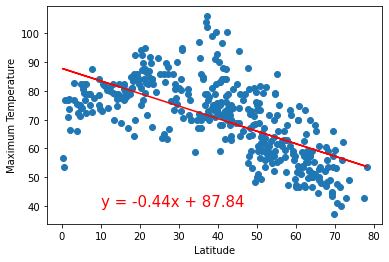

In [27]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Temperature"]
linear_plot(x_values, y_values, "Maximum Temperature", (10,40))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression